In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"F:\My Data Science\Data Analytics\R studio\Titanic\train.csv")
test = pd.read_csv(r"F:\My Data Science\Data Analytics\R studio\Titanic\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


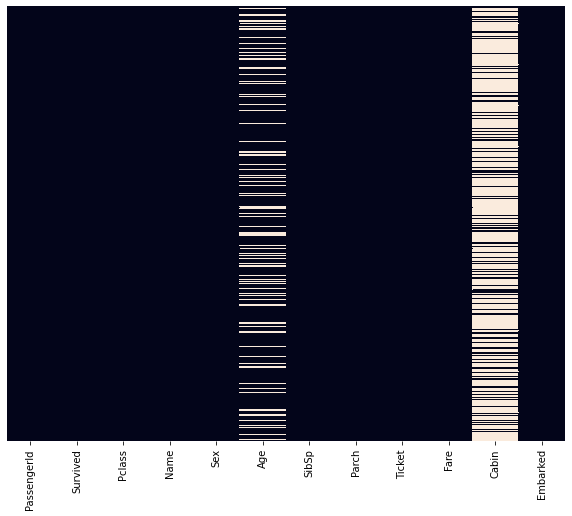

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.show()

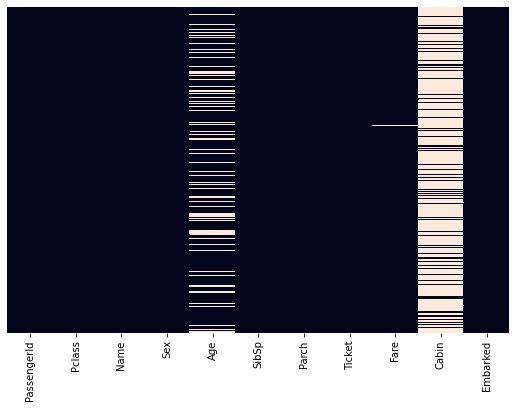

In [7]:
plt.figure(figsize=(9,6))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)
plt.show()

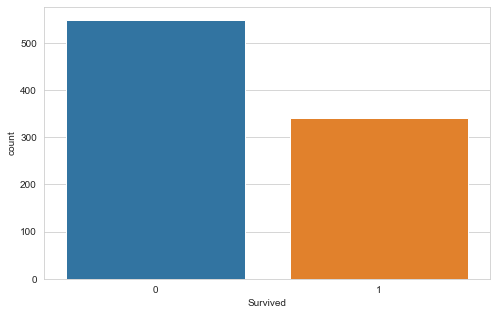

In [8]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

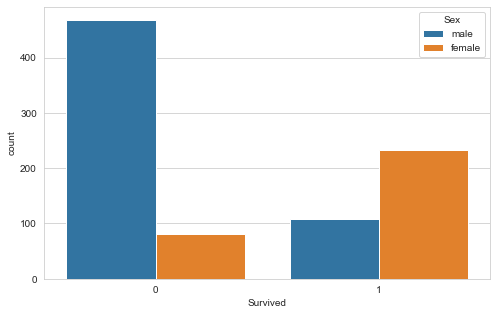

In [9]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

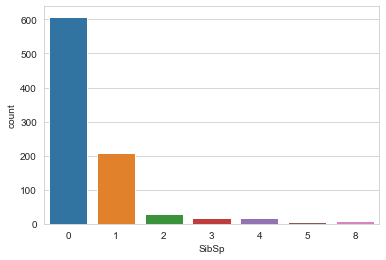

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=train)
plt.show()

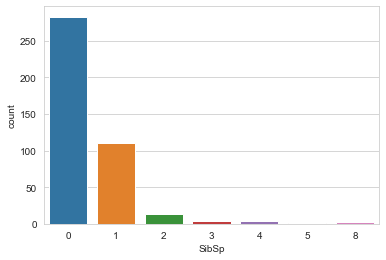

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=test)
plt.show()

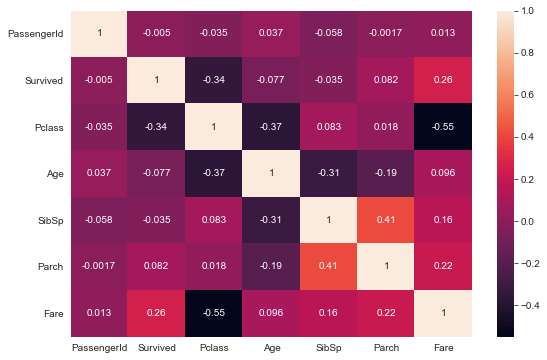

In [12]:
plt.figure(figsize=(9,6))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [13]:
#Merging train and test data sets to fill missing values
titanic= pd.concat([train,test],keys=('train','test'),sort=True)
titanic.drop(['Survived','Ticket','Name'],axis=1,inplace=True)

In [14]:
titanic.head()

Age Cabin Embarked     Fare  Parch  PassengerId  Pclass     Sex  \
train 0  22.0   NaN        S   7.2500      0            1       3    male   
      1  38.0   C85        C  71.2833      0            2       1  female   
      2  26.0   NaN        S   7.9250      0            3       3  female   
      3  35.0  C123        S  53.1000      0            4       1  female   
      4  35.0   NaN        S   8.0500      0            5       3    male   

         SibSp  
train 0      1  
      1      1  
      2      0  
      3      1  
      4      0

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Parch        1309 non-null   int64  
 5   PassengerId  1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Sex          1309 non-null   object 
 8   SibSp        1309 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 142.9+ KB


In [16]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
dtype: int64

In [17]:
#Out of nearly 1300 rows, Cabin is havin 1000 missing values, So here we are dropping Cabin column
titanic.drop(['Cabin'],axis=1,inplace=True)

In [18]:
titanic.head()

Age Embarked     Fare  Parch  PassengerId  Pclass     Sex  SibSp
train 0  22.0        S   7.2500      0            1       3    male      1
      1  38.0        C  71.2833      0            2       1  female      1
      2  26.0        S   7.9250      0            3       3  female      0
      3  35.0        S  53.1000      0            4       1  female      1
      4  35.0        S   8.0500      0            5       3    male      0

In [19]:
#Filling missing values of Age

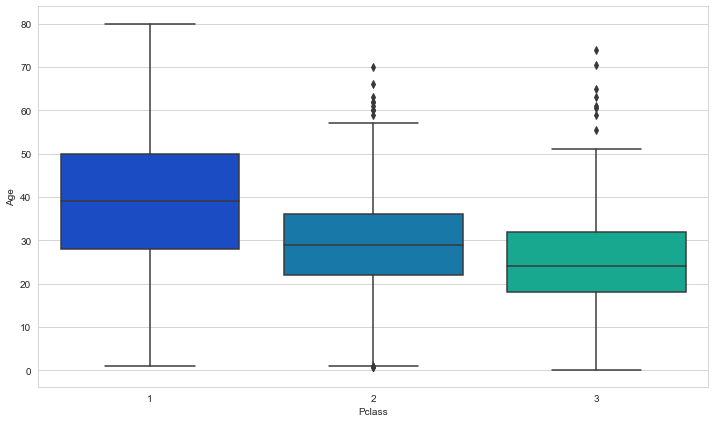

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=titanic, palette='winter')
plt.show()

In [24]:
#So, as per class, the mean of age are different. Here we take approximate values of means to fill NAs.

def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 40
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [25]:
#Applying the function
titanic['Age']=titanic[['Age','Pclass']].apply(fill_age,axis=1)

In [26]:
titanic.isnull().sum()

Age            0
Embarked       2
Fare           1
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
dtype: int64

In [28]:
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
#filling two embark NAs by s
titanic['Embarked'].fillna('S', inplace=True)

In [30]:
# Fare- using mean from the train set. i.e.32
titanic['Fare'].fillna(32, inplace=True)

In [31]:
titanic.isnull().sum()

Age            0
Embarked       0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
dtype: int64

In [32]:
titanic.head()

Age Embarked     Fare  Parch  PassengerId  Pclass     Sex  SibSp
train 0  24.0        S   7.2500      0            1       3    male      1
      1  40.0        C  71.2833      0            2       1  female      1
      2  24.0        S   7.9250      0            3       3  female      0
      3  40.0        S  53.1000      0            4       1  female      1
      4  24.0        S   8.0500      0            5       3    male      0

In [33]:
# Using labelencoder for Embarked and Sex
from sklearn.preprocessing import LabelEncoder

In [35]:
encode=LabelEncoder()

In [37]:
titanic['Embarked']=encode.fit_transform(titanic['Embarked'])
titanic['Sex']= encode.fit_transform(titanic['Sex'])

In [38]:
titanic.head()

Age  Embarked     Fare  Parch  PassengerId  Pclass  Sex  SibSp
train 0  24.0         2   7.2500      0            1       3    1      1
      1  40.0         0  71.2833      0            2       1    0      1
      2  24.0         2   7.9250      0            3       3    0      0
      3  40.0         2  53.1000      0            4       1    0      1
      4  24.0         2   8.0500      0            5       3    1      0

In [39]:
# Now separating the train and test datasets
idx=pd.IndexSlice
train_df=titanic.loc[idx[['train',], : ]]
test_df=titanic.loc[idx[['test',], : ]]
train_label = train['Survived']

In [40]:
print(train_df.shape)
print(test_df.shape)
print(train_label.shape)

(891, 8)
(418, 8)
(891,)


In [41]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(train_df,train_label, test_size=0.2)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [43]:
#Building Model1-Logistics
logmodel = LogisticRegression()

In [44]:
model = logmodel.fit(X_train,y_train)

In [45]:
y_pred = model.predict(X_test)

In [46]:
#Checking accuracy of model
print(accuracy_score(y_test,y_pred))

0.7597765363128491


In [47]:
print(confusion_matrix(y_test,y_pred))

[[94 14]
 [29 42]]


In [48]:
# Model2- Decision tree
tree1=DecisionTreeClassifier(criterion='entropy')

In [49]:
mt1 = tree1.fit(X_train,y_train)

In [51]:
y_t1= mt1.predict(X_test)

In [52]:
print(accuracy_score(y_test,y_t1))

0.7653631284916201


In [53]:
print(confusion_matrix(y_test,y_t1))

[[92 16]
 [26 45]]


In [54]:
# Model3 - Decision tree (gini)
tree2=DecisionTreeClassifier(criterion='gini')

In [55]:
mt2=tree2.fit(X_train,y_train)

In [56]:
y_t2 = mt2.predict(X_test)

In [57]:
print(accuracy_score(y_test,y_t2))

0.7597765363128491


In [58]:
print(confusion_matrix(y_test,y_t2))

[[89 19]
 [24 47]]
